In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import random
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
from sklearn import linear_model
import math

In [2]:
df = pd.read_csv("Datasets/Oil and Gas 1932-2014.csv")

In [3]:
df

,cty_name,iso3numeric,id,year,eiacty,oil_prod32_14,oil_price_2000,oil_price_nom,oil_value_nom,oil_value_2000,...,net_gas_exports_mboe,net_gas_exports_value,net_gas_exports_valuePOP,net_oil_gas_exports_valuePOP,population,pop_maddison,sovereign,mult_nom_2000,mult_nom_2014,mult_2000_2014
0,Afghanistan,4,AFG,1932,Afghanistan,NaN,10.860860,0.870000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,12.599874,17.321973,1.374774
1,Afghanistan,4,AFG,1933,Afghanistan,NaN,8.815239,0.670000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,13.280064,18.257080,1.374774
2,Afghanistan,4,AFG,1934,Afghanistan,NaN,12.715790,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,12.853008,17.669975,1.374774
3,Afghanistan,4,AFG,1935,Afghanistan,NaN,12.039690,0.970000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,12.537882,17.236748,1.374774
4,Afghanistan,4,AFG,1936,Afghanistan,NaN,13.383210,1.090000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,12.420786,17.075768,1.374774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15516,Zimbabwe,716,ZWE,2010,Zimbabwe,0.0,62.778052,79.495534,0.0,0.0,...,0.0,0.0,0.0,0.0,12571454.0,NaN,1,0.789705,1.085666,1.374774
15517,Zimbabwe,716,ZWE,2011,Zimbabwe,0.0,85.170708,111.255598,0.0,0.0,...,0.0,0.0,0.0,0.0,12754378.0,NaN,1,0.765541,1.052445,1.374774
15518,Zimbabwe,716,ZWE,2012,Zimbabwe,0.0,83.754465,111.669702,0.0,0.0,...,0.0,0.0,0.0,0.0,13724317.0,NaN,1,0.750020,1.031107,1.374774
15519,Zimbabwe,716,ZWE,2013,Zimbabwe,0.0,80.319530,108.658518,0.0,0.0,...,0.0,NaN,NaN,NaN,14149648.0,NaN,1,0.739192,1.016222,1.374774


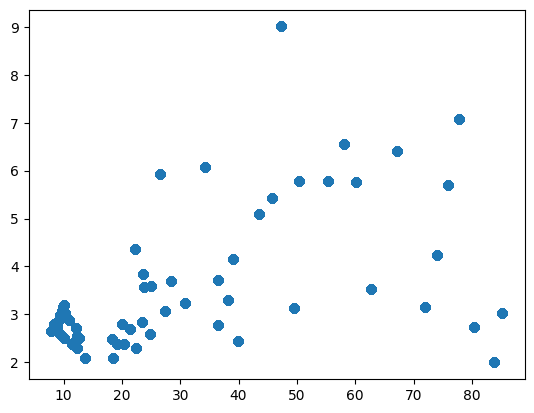

In [4]:
plt.scatter(df["oil_price_2000"], df["gas_price_2000"])
plt.show()

In [5]:
df.dropna(subset = ["oil_price_2000", "gas_price_2000"], inplace = True)
df = df.reset_index().loc[:,"cty_name" : "gas_price_2000"]

In [6]:
df

,cty_name,iso3numeric,id,year,eiacty,oil_prod32_14,oil_price_2000,oil_price_nom,oil_value_nom,oil_value_2000,oil_value_2014,gas_prod55_14,gas_price_2000_mboe,gas_price_2000
0,Afghanistan,4,AFG,1955,Afghanistan,NaN,12.265060,1.930000,NaN,NaN,NaN,NaN,1.238483e+07,2.287637
1,Afghanistan,4,AFG,1956,Afghanistan,NaN,12.074360,1.930000,NaN,NaN,NaN,NaN,1.331953e+07,2.460289
2,Afghanistan,4,AFG,1957,Afghanistan,NaN,11.476280,1.900000,NaN,NaN,NaN,NaN,1.285218e+07,2.373964
3,Afghanistan,4,AFG,1958,Afghanistan,NaN,12.247720,2.080000,NaN,NaN,NaN,NaN,1.378688e+07,2.546615
4,Afghanistan,4,AFG,1959,Afghanistan,NaN,12.143710,2.080000,NaN,NaN,NaN,NaN,1.472159e+07,2.719267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11215,Zimbabwe,716,ZWE,2010,Zimbabwe,0.0,62.778052,79.495534,0.0,0.0,0.0,0.0,1.915340e+07,3.537880
11216,Zimbabwe,716,ZWE,2011,Zimbabwe,0.0,85.170708,111.255598,0.0,0.0,0.0,0.0,1.637074e+07,3.023886
11217,Zimbabwe,716,ZWE,2012,Zimbabwe,0.0,83.754465,111.669702,0.0,0.0,0.0,0.0,1.080083e+07,1.995052
11218,Zimbabwe,716,ZWE,2013,Zimbabwe,0.0,80.319530,108.658518,0.0,0.0,0.0,0.0,1.483600e+07,2.740400


In [7]:
df["id"].unique()

array(['AFG', 'ALB', 'DZA', 'AGO', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE',
       'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BTN',
       'BOL', 'BIH', 'BWA', 'BRA', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM',
       'CMR', 'CAN', 'CPV', 'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM',
       'ZAR', 'COG', 'CRI', 'CIV', 'HRV', 'CUB', 'CYP', 'CZE', 'CZK',
       'DNK', 'DJI', 'DOM', 'TMP', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI',
       'EST', 'ETH', nan, 'FJI', 'FIN', 'FRA', 'GAB', 'GMB', 'GEO', 'DDR',
       'DEU', 'GHA', 'GRC', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND',
       'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'ISR', 'ITA',
       'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'PRK', 'KOR', 'KWT', 'KGZ',
       'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LTU', 'LUX', 'MKD',
       'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MRT', 'MUS', 'MEX',
       'MDA', 'MNG', 'MNE', 'MAR', 'MOZ', 'MMR', 'NAM', 'NPL', 'NLD',
       'NZL', 'NIC', 'NER', 'NGA', 'VDR', 'NOR', 'OMN', 'PAK', 'PAN',
       'PNG', '

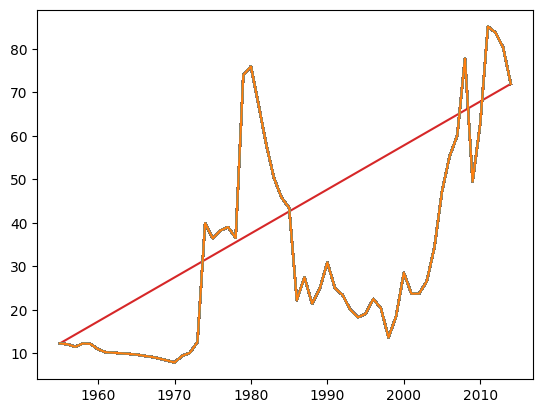

In [8]:
#plt.scatter(df["year"], df["oil_price_2000"])
for x in df["id"].unique():
    D = df[df["id"] == x]
    plt.plot(D["year"], D["oil_price_2000"])

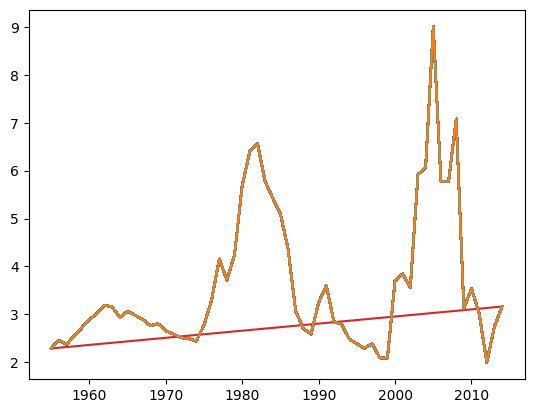

In [9]:
#plt.scatter(df["year"], df["gas_price_2000"])
for x in df["id"].unique():
    D = df[df["id"] == x]
    plt.plot(D["year"], D["gas_price_2000"])

In [10]:
np.corrcoef(df["oil_price_2000"], df["gas_price_2000"])

array([[1.        , 0.49684452],
       [0.49684452, 1.        ]])

In [11]:
grangercausalitytests(df[["oil_price_2000", "gas_price_2000"]], [1])


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=64.1597 , p=0.0000  , df_denom=11216, df_num=1
ssr based chi2 test:   chi2=64.1769 , p=0.0000  , df=1
likelihood ratio test: chi2=63.9940 , p=0.0000  , df=1
parameter F test:         F=64.1597 , p=0.0000  , df_denom=11216, df_num=1


{1: ({'ssr_ftest': (64.15971510758894, 1.2606872486026923e-15, 11216.0, 1),
   'ssr_chi2test': (64.17687622967549, 1.1373584265561738e-15, 1),
   'lrtest': (63.99401538519305, 1.2479773507693878e-15, 1),
   'params_ftest': (64.159715107597, 1.2606872485979446e-15, 11216.0, 1.0)},
   array([[0., 1., 0.]])])}

In [12]:
grangercausalitytests(df[["gas_price_2000", "oil_price_2000"]], [1])


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=18.4690 , p=0.0000  , df_denom=11216, df_num=1
ssr based chi2 test:   chi2=18.4739 , p=0.0000  , df=1
likelihood ratio test: chi2=18.4587 , p=0.0000  , df=1
parameter F test:         F=18.4690 , p=0.0000  , df_denom=11216, df_num=1


{1: ({'ssr_ftest': (18.468986066205655, 1.7414883742877268e-05, 11216.0, 1),
   'ssr_chi2test': (18.47392605891238, 1.7224472259410505e-05, 1),
   'lrtest': (18.458732559018245, 1.7362341159750878e-05, 1),
   'params_ftest': (18.468986066200916, 1.7414883742918136e-05, 11216.0, 1.0)},
   array([[0., 1., 0.]])])}

In [13]:
oil = np.array([list(df["oil_price_2000"])]).T
gas = np.array([list(df["gas_price_2000"])]).T

In [14]:
oil

array([[12.26506   ],
       [12.07436   ],
       [11.47628   ],
       ...,
       [83.75446549],
       [80.31953005],
       [71.97258787]])

In [15]:
oil.T[0]

array([12.26506   , 12.07436   , 11.47628   , ..., 83.75446549,
       80.31953005, 71.97258787])

In [16]:
SimpleRegression = linear_model.LinearRegression().fit(oil, gas)

In [17]:
m = SimpleRegression.coef_[0][0]
m

0.03187487887947484

In [18]:
c = SimpleRegression.intercept_[0]
c

2.5664266744214896

In [19]:
oil = oil.T[0]
gas = gas.T[0]

In [20]:
D = dict(zip(oil, gas))
oilSort = sorted(oil)
gasSort = [D[oilSort[i]] for i in range(len(oilSort))]
oil = oilSort
gas = gasSort

In [21]:
errors = [gas[i] - m*oil[i] - c for i in range(len(gas))]

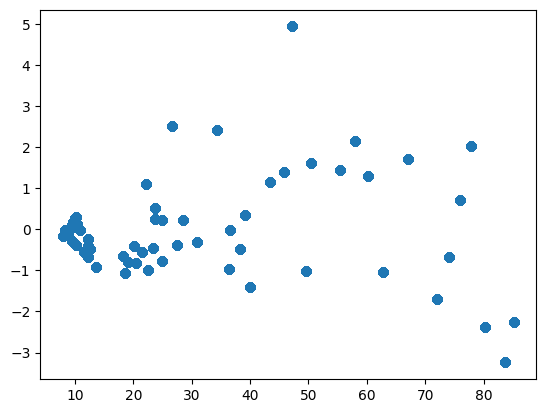

In [22]:
plt.scatter(oil, errors)

/var/folders/v9/5bvvpz4n1d5b0x86cn_kvkz80000gp/T/ipykernel_1256/2153561588.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors, hist = False)


<Axes: ylabel='Density'>

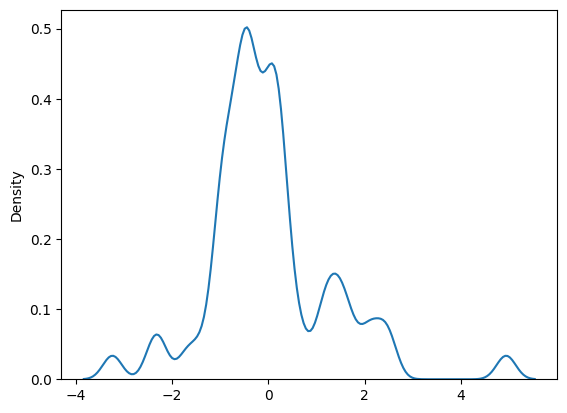

In [23]:
sns.distplot(errors, hist = False)

In [24]:
len(errors)

11220

In [25]:
#random.shuffle(errors)

In [26]:
X1 = errors[:5610]
X2 = errors[5610:]

/var/folders/v9/5bvvpz4n1d5b0x86cn_kvkz80000gp/T/ipykernel_1256/3995263786.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X1, hist = False)
/var/folders/v9/5bvvpz4n1d5b0x86cn_kvkz80000gp/T/ipykernel_1256/3995263786.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X2, hi

<Axes: ylabel='Density'>

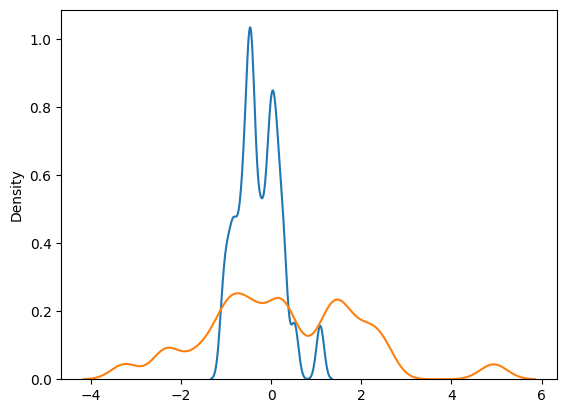

In [27]:
sns.distplot(X1, hist = False)
sns.distplot(X2, hist = False)

### Try weighted least square

In [28]:
quad_mod = np.polyfit(oil, gas, 2)
quad_mod

array([-1.12697899e-03,  1.27152935e-01,  1.26490195e+00])

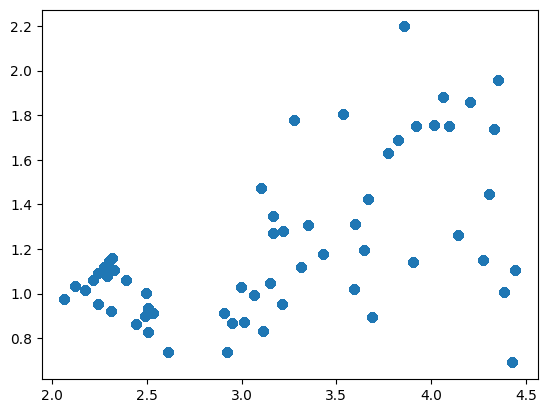

In [29]:
plt.scatter(np.log(oil), np.log(gas))

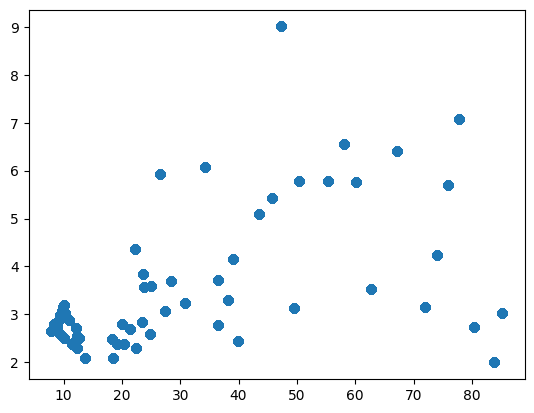

In [30]:
plt.scatter(oil, gas)

In [31]:
gas_fit = [quad_mod[0] * oil[i]**2 + quad_mod[1] * oil[i] + quad_mod[2] for i in range(0, len(oil))]

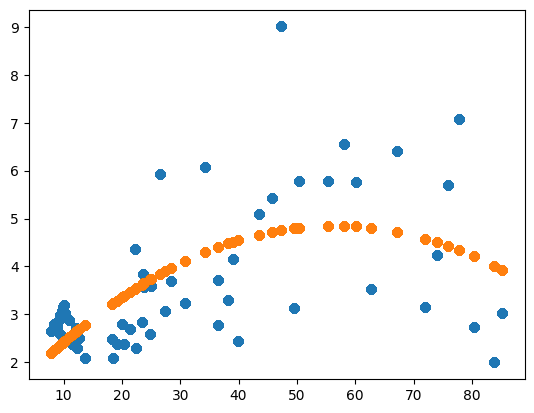

In [32]:
plt.scatter(oil, gas)
plt.scatter(oil, gas_fit)

In [33]:
quad_err = [gas[i] - gas_fit[i] for i in range(0, len(gas))]

In [34]:
len(quad_err)

11220

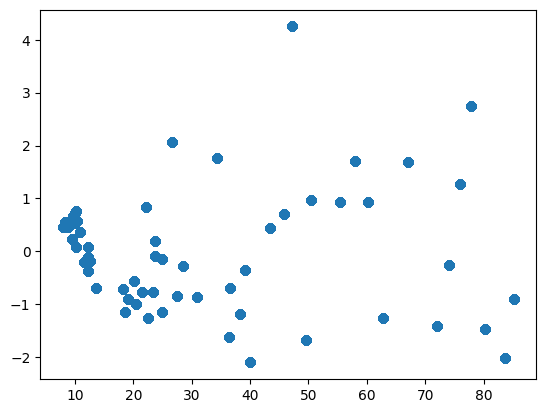

In [35]:
plt.scatter(oil, quad_err)

In [36]:
X1 = quad_err[:5610]
X2 = quad_err[5610:]

/var/folders/v9/5bvvpz4n1d5b0x86cn_kvkz80000gp/T/ipykernel_1256/3995263786.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X1, hist = False)
/var/folders/v9/5bvvpz4n1d5b0x86cn_kvkz80000gp/T/ipykernel_1256/3995263786.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X2, hi

<Axes: ylabel='Density'>

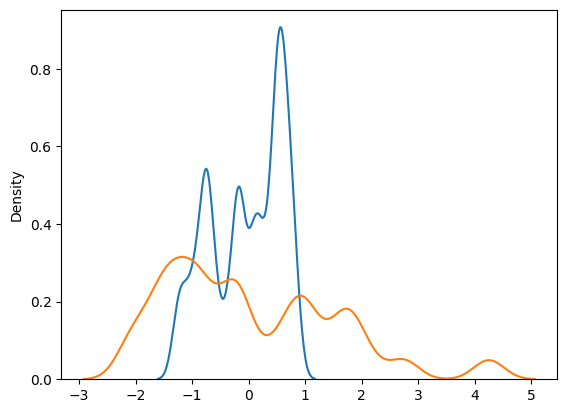

In [37]:
sns.distplot(X1, hist = False)
sns.distplot(X2, hist = False)

In [38]:
breaking_points = [9*i for i in range(0, 11)]

In [66]:
X_Mean = []
Std = []
for i in range(0, len(breaking_points) - 1):
    X = []
    Y = []
    for j in range(len(oil)):
        if ((oil[j] > breaking_points[i]) and (oil[j] <= breaking_points[i + 1])):
            X.append(oil[j])
            Y.append(quad_err[j])
    Y = np.array(Y)
    X_Mean.append(np.mean(X))
    Std.append(np.std(Y)**2 * len(Y) / (len(Y) - 1))

In [67]:
X_Mean = np.array(X_Mean)
Std = np.array(Std)

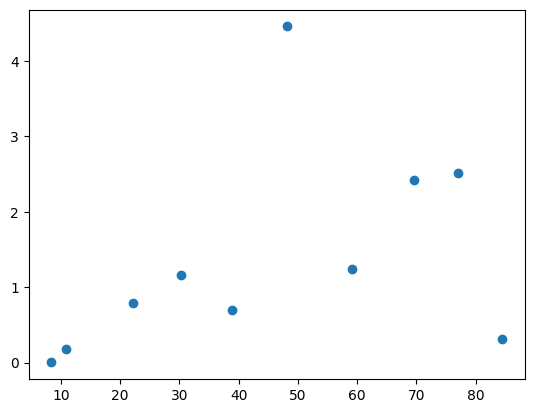

In [68]:
plt.scatter(X_Mean, Std)

In [43]:
#X_Mean = np.array([X_Mean]).T
#Std = np.array([Std]).T

In [69]:
quad_err = np.polyfit(X_Mean, Std, 2)

In [44]:
lm = linear_model.LinearRegression().fit(list(X_Mean), list(Std))

In [51]:
lm.predict([[5]])

array([[0.54245436]])

In [73]:
quad_err

array([-1.26359749e-03,  1.36216016e-01, -1.34783449e+00])

In [78]:
oil_weight = np.array([math.fabs(quad_err[0] * oil[i]**2 + quad_err[1] * oil[i] + quad_err[2]) for i in range(len(oil))])

In [57]:
oil_weight = np.array([lm.predict([[oil[i]]])[0][0] for i in range(len(oil))])

In [79]:
W = np.diag(oil_weight)

In [80]:
V = np.diag(np.sqrt(oil_weight))

In [95]:
oil_weighted = np.array([oil[i]*V[i][i] for i in range(len(oil))])
gas_weighted = np.array([gas[i]*V[i][i] for i in range(len(oil))])

In [88]:
oil_weighted[::]

[13.26106129084256,
 13.26106129084256,
 13.26106129084256,
 13.26106129084256,
 13.26106129084256,
 13.26106129084256,
 13.26106129084256,
 13.26106129084256,
 13.26106129084256,
 13.26106129084256,
 13.26106129084256,
 13.26106129084256,
 13.26106129084256,
 13.26106129084256,
 13.26106129084256,
 13.26106129084256,
 13.26106129084256,
 13.26106129084256,
 13.26106129084256,
 13.26106129084256,
 13.26106129084256,
 13.26106129084256,
 13.26106129084256,
 13.26106129084256,
 13.26106129084256,
 13.26106129084256,
 13.26106129084256,
 13.26106129084256,
 13.26106129084256,
 13.26106129084256,
 13.26106129084256,
 13.26106129084256,
 13.26106129084256,
 13.26106129084256,
 13.26106129084256,
 13.26106129084256,
 13.26106129084256,
 13.26106129084256,
 13.26106129084256,
 13.26106129084256,
 13.26106129084256,
 13.26106129084256,
 13.26106129084256,
 13.26106129084256,
 13.26106129084256,
 13.26106129084256,
 13.26106129084256,
 13.26106129084256,
 13.26106129084256,
 13.26106129084256,


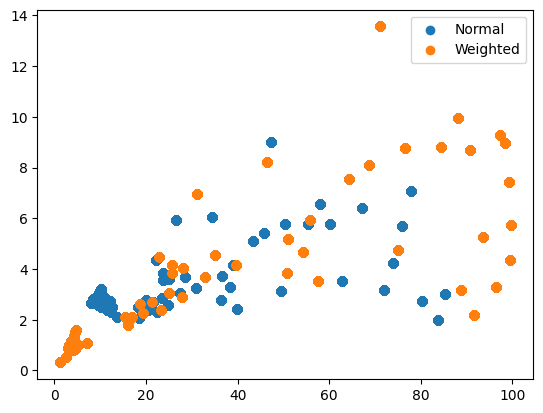

In [99]:
plt.scatter(oil, gas, label = "Normal")
plt.scatter(oil_weighted, gas_weighted, label = "Weighted")
plt.legend()